Next we'll take a look at the ICUSTAYS table that contains information about every unique ICU Stay.

ICUSTAY_ID is the primary key for this table.

Let's start with some necessary imports.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style(style='whitegrid')

In [4]:
icustays_df = pd.read_csv('..\Extracted CSVs\ICUSTAYS.csv')

Getting a feel of the data.

In [5]:
icustays_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,365,268,110404,280836,carevue,MICU,MICU,52,52,2198-02-14 23:27:38,2198-02-18 05:26:11,3.2490
1,366,269,106296,206613,carevue,MICU,MICU,52,52,2170-11-05 11:05:29,2170-11-08 17:46:57,3.2788
2,367,270,188028,220345,carevue,CCU,CCU,57,57,2128-06-24 15:05:20,2128-06-27 12:32:29,2.8939
3,368,271,173727,249196,carevue,MICU,SICU,52,23,2120-08-07 23:12:42,2120-08-10 00:39:04,2.0600
4,369,272,164716,210407,carevue,CCU,CCU,57,57,2186-12-25 21:08:04,2186-12-27 12:01:13,1.6202


In [6]:
icustays_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61532 entries, 0 to 61531
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ROW_ID          61532 non-null  int64  
 1   SUBJECT_ID      61532 non-null  int64  
 2   HADM_ID         61532 non-null  int64  
 3   ICUSTAY_ID      61532 non-null  int64  
 4   DBSOURCE        61532 non-null  object 
 5   FIRST_CAREUNIT  61532 non-null  object 
 6   LAST_CAREUNIT   61532 non-null  object 
 7   FIRST_WARDID    61532 non-null  int64  
 8   LAST_WARDID     61532 non-null  int64  
 9   INTIME          61532 non-null  object 
 10  OUTTIME         61522 non-null  object 
 11  LOS             61522 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 5.6+ MB


Let's take a look at the length of stay in the ICU for each unique ICU admission.

In [7]:
icustays_df[['LOS', 'SUBJECT_ID']]

,LOS,SUBJECT_ID
0,3.2490,268
1,3.2788,269
2,2.8939,270
3,2.0600,271
4,1.6202,272
...,...,...
61527,2.1894,94944
61528,2.4942,94950
61529,0.9259,94953
61530,2.3346,94954


A visual representation of the length of stay in the ICU.

<AxesSubplot:xlabel='LOS', ylabel='Count'>

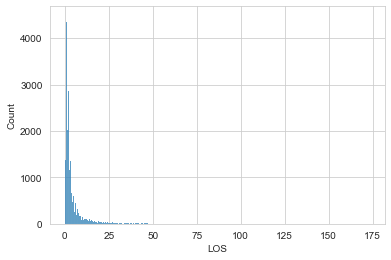

In [8]:
sns.histplot(icustays_df['LOS'])

A distribution of LOS <50 days

<AxesSubplot:xlabel='LOS', ylabel='Count'>

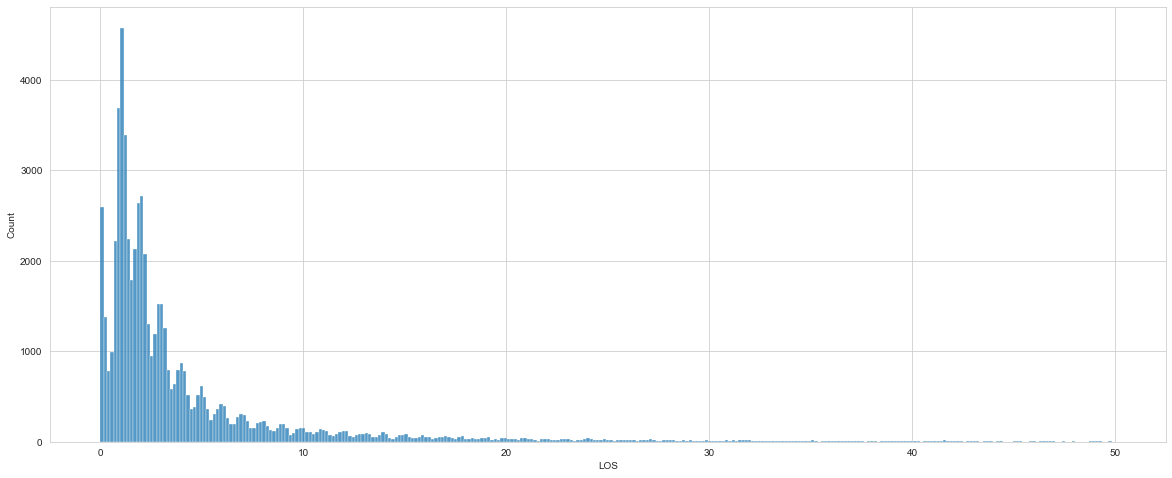

In [10]:
plt.figure(figsize=(20,8))
sns.histplot(icustays_df[icustays_df['LOS']<=50]['LOS'])

Next we take a look at the mean of the LOS when we group by the first ICU the patient stayed in and the last ICU the patient stayed in.

In [11]:
icustays_df.groupby('FIRST_CAREUNIT')['LOS'].mean()

FIRST_CAREUNIT
CCU       3.901562
CSRU      3.900016
MICU      4.012769
NICU     10.025806
SICU      4.706723
TSICU     4.443861
Name: LOS, dtype: float64

<AxesSubplot:xlabel='FIRST_CAREUNIT'>

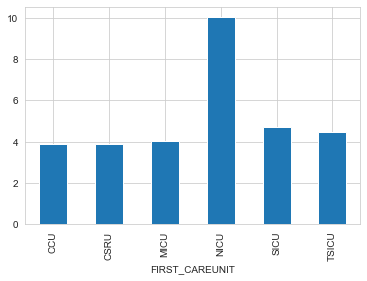

In [12]:
icustays_df.groupby('FIRST_CAREUNIT')['LOS'].mean().plot(kind='bar')

In [13]:
icustays_df.groupby('LAST_CAREUNIT')['LOS'].mean()

LAST_CAREUNIT
CCU       3.446285
CSRU      3.874493
MICU      4.122262
NICU     10.025806
SICU      5.044084
TSICU     4.124977
Name: LOS, dtype: float64

<AxesSubplot:xlabel='LAST_CAREUNIT'>

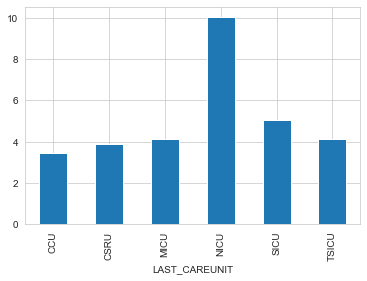

In [14]:
icustays_df.groupby('LAST_CAREUNIT')['LOS'].mean().plot(kind='bar')

From the above data and visualisations we notice that there is not a significant different between the above two. From this we can infer that there weren't a huge number of ICU transfers.

The mean length of stay in the ICU.

In [15]:
icustays_df['LOS'].mean()

4.91797158089793

In [16]:
icustays_df['LOS'].describe()

count    61522.000000
mean         4.917972
std          9.638784
min          0.000100
25%          1.108025
50%          2.092250
75%          4.483175
max        173.072500
Name: LOS, dtype: float64

Let's compare the first and last units that the patients stayed in.

In [17]:
icustays_df[['FIRST_CAREUNIT', 'LAST_CAREUNIT']]

,FIRST_CAREUNIT,LAST_CAREUNIT
0,MICU,MICU
1,MICU,MICU
2,CCU,CCU
3,MICU,SICU
4,CCU,CCU
...,...,...
61527,CSRU,CSRU
61528,CCU,CCU
61529,SICU,SICU
61530,CSRU,CSRU


Checking if the patients changed wards

In [18]:
icustays_df[icustays_df['FIRST_CAREUNIT']!=icustays_df['LAST_CAREUNIT']]['SUBJECT_ID']

3          271
20         287
46         306
58         318
84         339
         ...  
61384    90546
61385    90549
61430    90699
61473    92005
61523    94937
Name: SUBJECT_ID, Length: 3833, dtype: int64

Comparing the first and last ward the patients stayed in

In [19]:
icustays_df[['FIRST_WARDID', 'LAST_WARDID']]

,FIRST_WARDID,LAST_WARDID
0,52,52
1,52,52
2,57,57
3,52,23
4,57,57
...,...,...
61527,15,15
61528,7,7
61529,57,57
61530,15,15


In [20]:
icustays_df[icustays_df['FIRST_WARDID']!=icustays_df['LAST_WARDID']]['SUBJECT_ID']

3          271
20         287
46         306
58         318
62         321
         ...  
61430    90699
61455    91948
61473    92005
61498    94863
61523    94937
Name: SUBJECT_ID, Length: 5699, dtype: int64

From the above code cells we can infer that there were quite a few transfers between different units and between different wards.